In [31]:
import pandas as pd
df = pd.read_csv("Salary_Data.csv")
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [32]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,Age,Years of Experience,Salary,Gender_Male,Gender_Other,Education Level_Bachelor's Degree,Education Level_High School,Education Level_Master's,Education Level_Master's Degree,Education Level_PhD,...,Job Title_Supply Chain Manager,Job Title_Technical Recruiter,Job Title_Technical Support Specialist,Job Title_Technical Writer,Job Title_Training Specialist,Job Title_UX Designer,Job Title_UX Researcher,Job Title_VP of Finance,Job Title_VP of Operations,Job Title_Web Developer
0,32.0,5.0,90000.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,28.0,3.0,65000.0,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,45.0,15.0,150000.0,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,36.0,7.0,60000.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,52.0,20.0,200000.0,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [33]:
df.shape

(6704, 203)

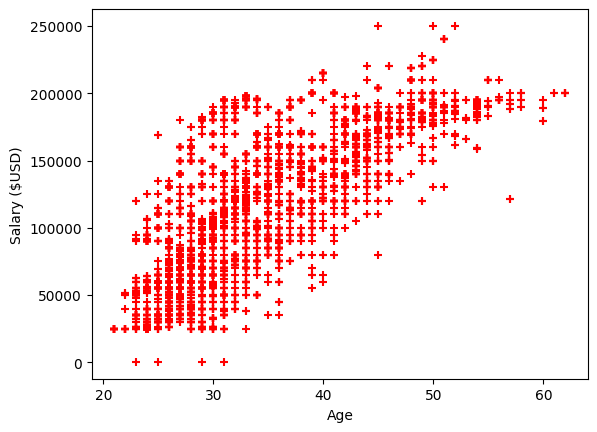

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.xlabel("Age")
plt.ylabel("Salary ($USD)")
plt.scatter(df.Age, df.Salary, color='red', marker='+')

In [35]:
df.isna().sum()

Age                           2
Years of Experience           3
Salary                        5
Gender_Male                   0
Gender_Other                  0
                             ..
Job Title_UX Designer         0
Job Title_UX Researcher       0
Job Title_VP of Finance       0
Job Title_VP of Operations    0
Job Title_Web Developer       0
Length: 203, dtype: int64

In [36]:
df.dropna(inplace=True)

In [37]:
df.isna().sum()

Age                           0
Years of Experience           0
Salary                        0
Gender_Male                   0
Gender_Other                  0
                             ..
Job Title_UX Designer         0
Job Title_UX Researcher       0
Job Title_VP of Finance       0
Job Title_VP of Operations    0
Job Title_Web Developer       0
Length: 203, dtype: int64

In [38]:
x = df.drop('Salary', axis='columns')
y = df.Salary

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2)

In [49]:
from sklearn.linear_model import LogisticRegression
model_reg = LogisticRegression()
model_reg.fit(x_train, y_train)
model_reg.score(x_test, y_test)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.24253731343283583

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Education Level_Bachelor's Degree
- Education Level_High School
- Education Level_Master's
- Education Level_Master's Degree
- Education Level_PhD
- ...


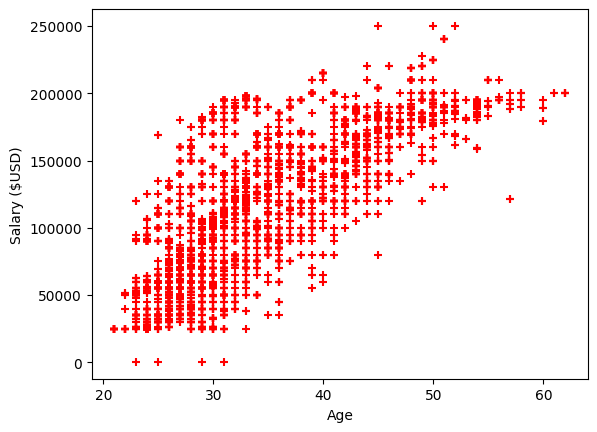

In [48]:
plt.xlabel("Age")
plt.ylabel("Salary ($USD)")
plt.scatter(df.Age, df.Salary, color='red', marker='+')
plt.plot(df.Age, model_reg.predict(df[['Age']]), color='blue')